In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time
import datetime as datetime
import mplfinance as mpf

In [2]:
!pip install mplfinance

In [3]:
# We want to examine market liquidity in CeFi markets: plot a density plot of prices vs ask volume 

In [4]:
# Candlestick spread chart
# Data: Open, high, low, close, volume in given pool
# Uniswap v3 Query
uniswap_api_key = "2b45e1f034a61c2f41bf4bcd6731335a"
subgraph_id = "5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV"
url = f"https://gateway.thegraph.com/api/{uniswap_api_key}/subgraphs/id/{subgraph_id}"

pool_address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"  # CHANGE THIS, MAKE SURE TOKEN1 IS USDC
# Dataframe construction
uniswap_candlestick = pd.DataFrame(columns=['Date', 'Open', 'Close', 'High', 'Low', 'TVL Available (USD)', 'Volume', 'Liquidity'])

# Make queries across date range:
starting_date = "2023-01-01" # CHANGE THIS (YYYY-MM-DD)
ending_date = "2023-03-01" # CHANGE THIS (YYYY-MM-DD)
index = 0

for date in pd.date_range(starting_date, ending_date):
    # Get our desired date
    date_str = date_str = date.strftime("%Y-%m-%d")
    # Convert date to midnight UTC UNIX timestamp
    ts = int(datetime.datetime.fromisoformat(date_str).replace(tzinfo=datetime.timezone.utc).timestamp()) 
    
    # Data queried (all prices of token0 in terms of token1. Make sure you query the right pool so prices are in USDC, token1 = USDC)
    # Opening (first recorded) price, closing (last recorded) price, high price, low price, tvl in pool (in USD), total volume
    # traded in swaps on that day
    query = f"""
    {{
      poolDayDatas(
        first: 1
        where: {{
          pool: "{pool_address.lower()}",
          date: {ts}
        }}
      ) {{
        open
        high
        low
        close
        volumeUSD
        tvlUSD
        liquidity
      }}
    }}
    """

    response = requests.post(url, json={"query": query}).json()
    response = response['data']['poolDayDatas'][0]

    # Dataframe Construction (Continued)
    uniswap_candlestick.loc[len(uniswap_candlestick)] = [date_str, response['open'], response['close'],
                                                         response['high'], response['low'], response['tvlUSD'], response['volumeUSD'],
                                                         response['liquidity']]
    # Uncomment this if exceeding rate limit
    # time.sleep(1) 

# Cleanup
uniswap_candlestick["Date"] = pd.to_datetime(uniswap_candlestick["Date"])
uniswap_candlestick = uniswap_candlestick.set_index("Date")
uniswap_candlestick = uniswap_candlestick.astype(float)

uniswap_candlestick.head(20)

,Open,Close,High,Low,TVL Available (USD),Volume,Liquidity
Date,,,,,,,
2023-01-01,1196.136875,1196.136875,1200.132738,1192.758261,2.878774e+08,1.883385e+06,1.237163e+19
2023-01-02,1200.128827,1200.128827,1219.705405,1196.822404,2.868450e+08,6.625803e+06,1.119325e+19
2023-01-03,1215.162168,1215.162168,1215.659315,1208.214382,2.880239e+08,2.027128e+06,1.237780e+19
2023-01-04,1211.783079,1211.783079,1272.669699,1211.783079,2.829228e+08,1.771885e+07,9.930634e+18
2023-01-05,1253.344908,1253.344908,1255.448896,1246.206931,2.896032e+08,3.210230e+06,1.056122e+19
2023-01-06,1250.936338,1250.936338,1272.195285,1240.739862,2.912504e+08,8.178463e+06,1.213513e+19
2023-01-07,1268.093822,1268.093822,1268.710181,1261.560700,2.902585e+08,1.297968e+06,1.070529e+19
2023-01-08,1261.987037,1261.987037,1289.502262,1261.981381,2.931660e+08,6.854604e+06,1.038714e+19
2023-01-09,1289.588432,1289.588432,1340.294685,1289.230441,2.918956e+08,1.587138e+07,9.751845e+18


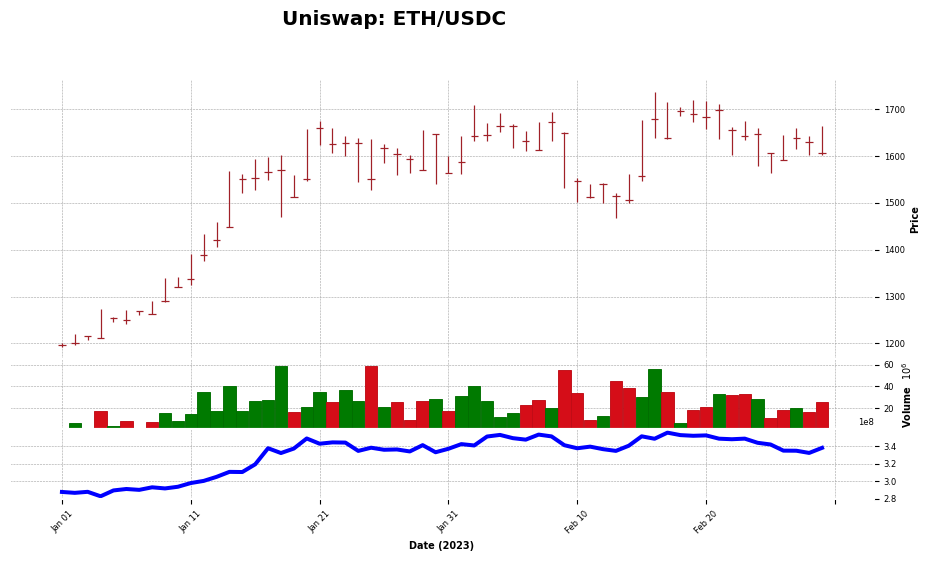

In [109]:
# Create Candlestick Plot
# Install dependency in terminal: pip install mplfinance (in the directory that you are running this notebook in)
s = mpf.make_mpf_style(
    base_mpf_style='charles',
    rc={
        'axes.labelsize': 7,
        'xtick.labelsize': 6,
        'ytick.labelsize': 6
    }
)

# CHANGE THESE LABELS ACCORDINGLY
mpf.plot(
    uniswap_candlestick,
    type='candle',
    style=s,
    figsize=(12, 6),
    volume=True,
    title = 'Uniswap: ETH/USDC',
    xlabel = 'Date (2023)',
    addplot=[
        mpf.make_addplot(uniswap_candlestick["TVL Available (USD)"], panel=2, color='blue')
        ],
    panel_ratios=(4, 1)
)